# Project Proposal Group 33



### Introduction 


### Preliminary Data Analysis


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
url <- "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
tennis_data <- read_csv(url)
head(tennis_data, n=10)

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,22 (11-02-1997),Poland,Right-handed,Wikipedia,31 (1398),31 (20-01-2020),Hubert Hurkacz,Two-handed,"$1,517,157",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,28 (18-11-1991),United States,Right-handed,Wikipedia,307 (131),213 (31-10-2016),Sekou Bangoura,Two-handed,"$278,709",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,21 (12-05-1998),"Taiwan, Province of China",Right-handed,Wikipedia,232 (205),229 (04-11-2019),Tung Lin Wu,Two-handed,"$59,123",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,25 (29-07-1994),Uzbekistan,Right-handed,Wikipedia,417 (81),253 (17-07-2017),Sanjar Fayziev,Two-handed,"$122,734",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


For our project we chose the columns Age, Best Rank, Prize Money, Current Rank, and Seasons. We are trying to predict the Best Rank using the other 4 variables. These predictors were selected because they contain the most data compared to other columns which mostly contain N/As. 

We also isolated the variables we wanted to use, deleted empty observations, and removed unnecessary characters. 

In [ ]:
colnames(tennis_data) <- make.names(colnames(tennis_data))
tennis_data_separated <- tennis_data |> select(Age, Best.Rank, Prize.Money, Seasons, Current.Rank) |>
                separate(col = Age,
                        into = c("Age", "date"),
                        sep=" ",
                        convert=TRUE) |>
                separate(col = Best.Rank,
                        into = c("best_rank", "date_rank"),
                        sep=" ",
                        convert=TRUE) |>

                separate(col = Current.Rank,
                        into = c("current_rank", "date_cur_rank"),
                        sep=" ",
                        convert=TRUE) |>
    select(Age, best_rank, current_rank, Prize.Money, Seasons)

head(tennis_data_separated, n = 10)

In [12]:
tennis_data_separated$Prize.Money <- gsub("US", " ", tennis_data_separated$Prize.Money)


tennis_data_separated$Prize.Money <- gsub("US", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- gsub("all-time leader in earnings", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- gsub("11th", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- gsub("24th", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- gsub("10th", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("14th", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("27th", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("15th", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("30th", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("All-time leader in earnings", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("4th", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("28th", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("2nd", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("6th", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("33rd", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("26th", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("24th", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("48th", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("41st", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("\\$","", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub(" ", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("   ", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub("  ", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- sub(" all-time in earnings", "", tennis_data_separated$Prize.Money)
tennis_data_separated$Prize.Money <- gsub(",", "", tennis_data_separated$Prize.Money)

tennis_data_renamed <- tennis_data_separated |>
    rename("Best_Rank" = "best_rank") |>
    rename("Current_Rank" = "current_rank")
head(tennis_data_renamed, n = 10)

Age,Best_Rank,Current_Rank,Prize.Money,Seasons
<int>,<int>,<int>,<chr>,<dbl>
26,363,378,NA,NA
18,316,326,59040,NA
32,44,178,3261567,14
21,130,236,374093,2
27,17,183,6091971,11
22,31,31,1517157,5
28,213,307,278709,1
21,229,232,59123,1
25,253,417,122734,5


We also converted the Prize Money column from character into double.

In [13]:
tennis_data_mutated <- tennis_data_renamed |>
    mutate(Prize_Money = as.numeric(Prize.Money)) |>
    na.omit() |>
    select(Age, Best_Rank, Current_Rank, Prize_Money, Seasons)

head(tennis_data_mutated, n = 10)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


Age,Best_Rank,Current_Rank,Prize_Money,Seasons
<int>,<int>,<int>,<dbl>,<dbl>
32,44,178,3261567,14
21,130,236,374093,2
27,17,183,6091971,11
22,31,31,1517157,5
28,213,307,278709,1
21,229,232,59123,1
25,253,417,122734,5
20,104,104,74927,3
19,17,22,1893476,3


We divided the data into a 75% training and 25% testing.

In [11]:
tennis_data_split <- initial_split(tennis_data_mutated, prop = .75, strata = Current_Rank)
tennis_data_train <- training(tennis_data_split)
tennis_data_test <- testing(tennis_data_split)
head(tennis_data_train, n = 10)
head(tennis_data_test, n = 10)

Age,Best_Rank,Current_Rank,Prize_Money,Seasons
<int>,<int>,<int>,<dbl>,<dbl>
22,31,31,1517157,5
23,4,4,10507693,5
20,47,54,1285541,3
32,9,12,13470614,16
29,23,27,4850190,11
29,32,32,2301746,13
25,80,84,827193,5
21,43,43,1062355,3
35,18,85,10581476,18


Age,Best_Rank,Current_Rank,Prize_Money,Seasons
<int>,<int>,<int>,<dbl>,<dbl>
21,130,236,374093,2
27,17,183,6091971,11
19,17,22,1893476,3
22,25,34,2722314,6
33,19,130,10821168,14
32,11,45,11912152,15
30,98,105,898701,7
26,293,448,32892,1
30,75,123,631094,3


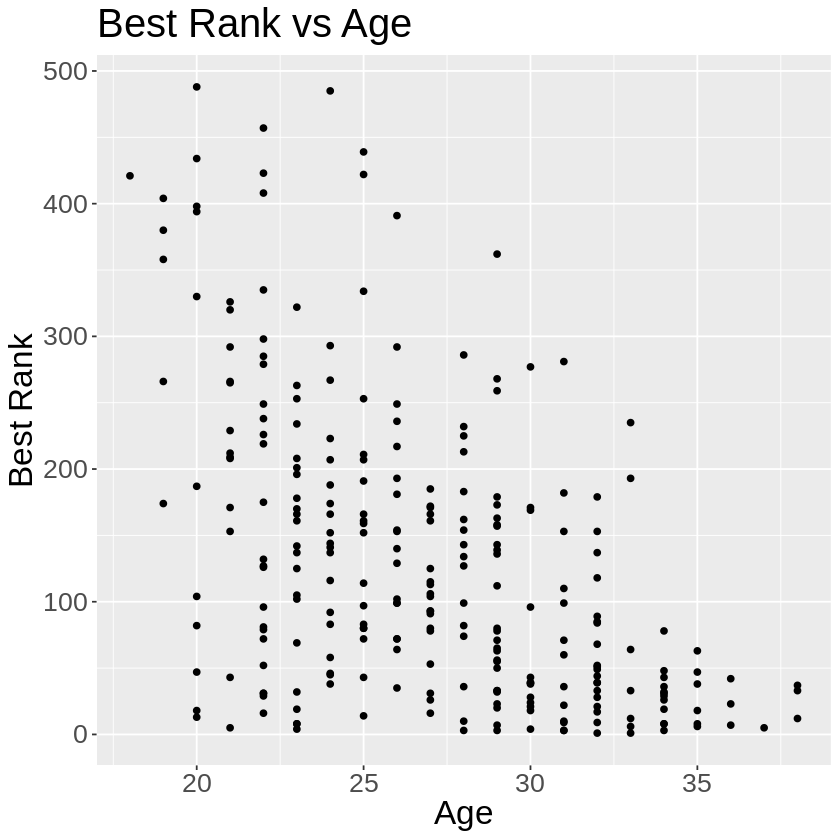

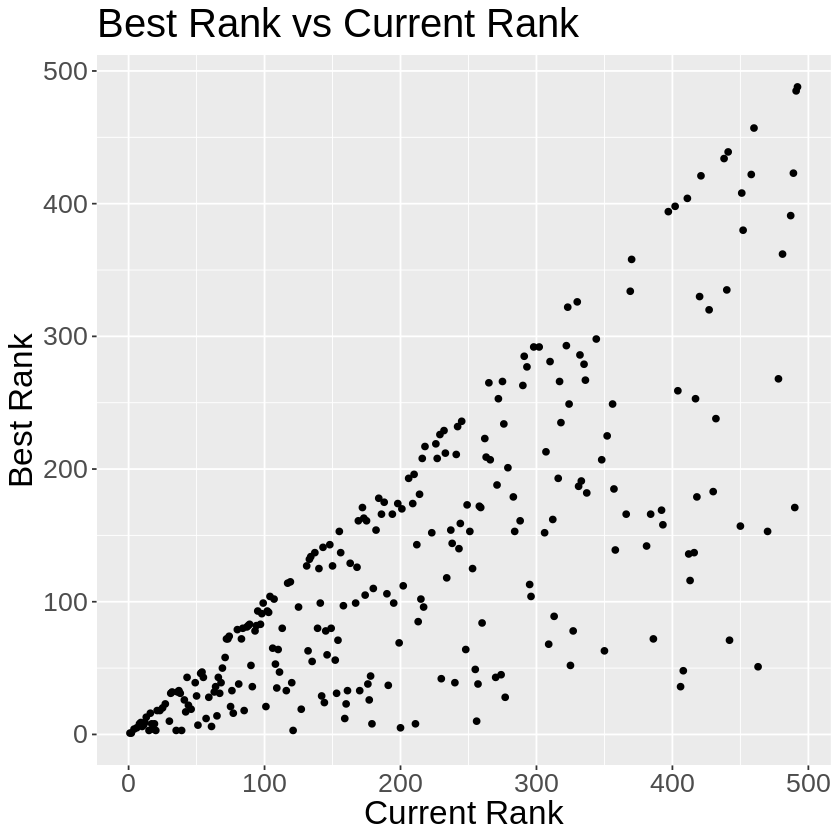

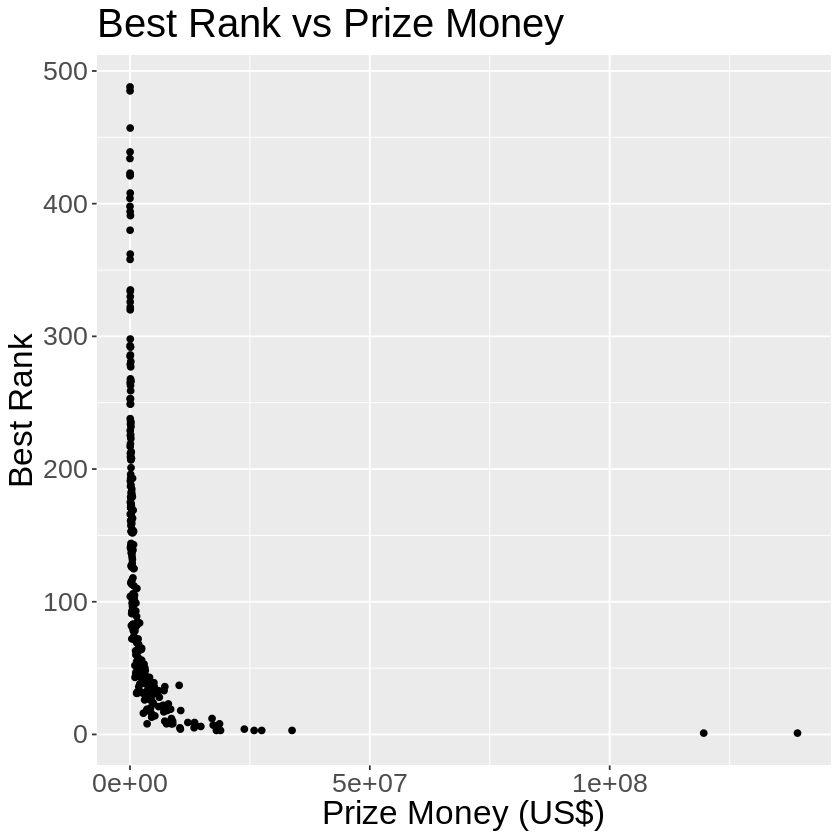

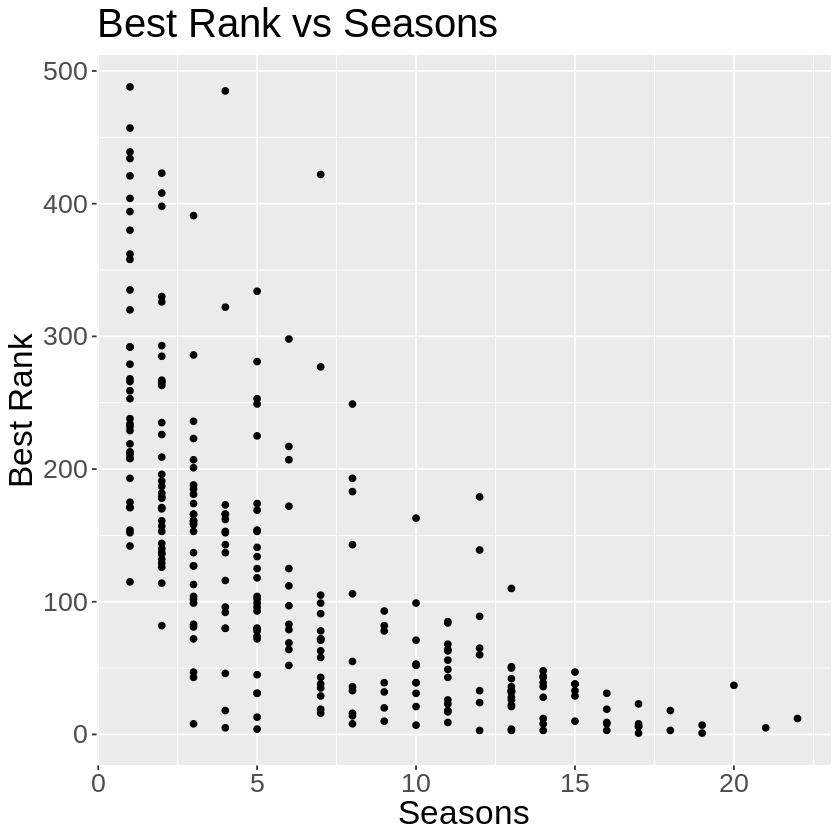

In [25]:
ggplot(tennis_data_train, aes(x = Age, y = Best_Rank)) +
    geom_point() +
    labs(title = "Best Rank vs Age", x = "Age", y = "Best Rank") +
    theme(text = element_text(size = 20))

ggplot(tennis_data_train, aes(x = Current_Rank, y = Best_Rank)) +
    geom_point() +
    labs(title = "Best Rank vs Current Rank", x = "Current Rank", y = "Best Rank") +
    theme(text = element_text(size = 20))

ggplot(tennis_data_train, aes(x = Prize_Money, y = Best_Rank)) +
    geom_point() +
    labs(title = "Best Rank vs Prize Money", x = "Prize Money (US$)", y = "Best Rank") +
    theme(text = element_text(size = 20))

ggplot(tennis_data_train, aes(x = Seasons, y = Best_Rank)) +
    geom_point() +
    labs(title = "Best Rank vs Seasons", x = "Seasons", y = "Best Rank") +
    theme(text = element_text(size = 20))

As you can tell from the plots the data needs to be standardized because the all have very different ranges and some have significant outliers like Prize Money.

 Age and Best Rank have a weak negative linear relationship. Best Rank and Current Rank have a positive linear relationship. Best Rank and Prize Money have a negative exponential relationship. There is also a weak exponential decay relationship between Best rank and Seasons.

### Methods

We plan on Using K-nearest neighbor regreasion since all of the variables we selected are quantative. We will have to standardize the data and determine the number of neighbors depending on the smallest estimated error which we will determine from the five fold cross validation from our tennis_data_train dataset. We will evaluate optimal parameter value for our model by using the standard testing dataset to calculate the standard error, we will do this to all of our variables to ensure we have sufficient amount of predictors.

We will use similar scatter plot as the ones above with our standardized data, the predictors will be on the x-axis of their induvidual plot and the predicted Best Rank will be on the y-axis. 


### Expected Outcomes

we expect that higher Best rank would be associated with the younger players since as they get older their performance decreases and the get closer to retirement. We expect that after we standardize our data players with higher prize money will have higher best ranks since this means they have been winning larger tournaments. Furthermore players who have a higher current rank will also have a higher best rank because we don't expect there to be so much discrepancy between the two variables. 

This could help future tennis playe to predict the trajectory of their career if they are going to keep getting better, rize in ranks, or when their careers will peak.

Our model will predict tennis players projected ranks based on seasons played, current rank, age, and prize money.

Are there any other variables that have a significant impact on a tennis players best rank?

Is this model applecaple to other individual player sports such as golf or squash?


### References

"Player Stats for Top 500 Players" from: 
 https://www.ultimatetennisstatistics.com/
 Accesed through UBC Canvas:
https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS